In [72]:
# Install NLTK for tokenization algorithms

!pip install nltk
!pip install matplotlib

In [73]:
# Import necessary libraries for corpora training and for using NLTK library.

from collections import defaultdict
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to C:\Users\Agasti
[nltk_data]     Mhatre\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Agasti
[nltk_data]     Mhatre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
# Put each token in a linked list node. This way, when merges happen,
# the node after it can be removed in O(1) time and the new merged token
# can happen in the current node.
class ListNode:

    def __init__(self, val):

        self.val = val
        self.next = None

## Common functions used in both training and testing functions for BPE

# Convert current string into a linked list format
def string_to_linked_list(curr_string):

    # Head of the linked List
    l_string = curr = None
    c = 0

    # Skip over any leading whitespace in the string
    while c < len(curr_string):

        if curr_string[c] not in [' ', '\n', '\t']: break
        c += 1
        
    # Turn string in a linked list where each node
    # is either a letter or an underscore (remove whitespace)
    while c < len(curr_string): 
    
        # If the current letter in the string is a whitespace, turn
        # it into an underscore and put it in the linked list
        # Otherwise, continue on in the string and add each
        # letter to a linked list node
        addUnderScore = False
        while c < len(curr_string):
            
            if curr_string[c] not in [' ', '\n', '\t']: break
            else: addUnderScore = True
            
            c += 1

        if addUnderScore:

            curr.next = ListNode('_')
            curr = curr.next

        if c >= len(curr_string): break

        # Set the head of the l_string linked list
        # if it is not currently set.
        # Otherwise, add another child node to the
        # linked list
        if l_string == None: 
            
            l_string = ListNode(curr_string[c])
            curr = l_string

        else:

            curr.next = ListNode(curr_string[c])
            curr = curr.next

        c += 1

    return l_string

# Combine two tokens into one by
# removing y's node and merging it
# into x's node
def merge_rules(l_string, x, y): 
        
    temp = x + y
    curr = l_string
    while curr != None:

        if curr.next == None: break
        if (x == curr.val) and (y == curr.next.val):

            curr.next = curr.next.next
            curr.val = temp

        curr = curr.next

# Extract the current vocabulary
# by traversing the entire linked
# list and return it so it could
# be added to the larger vocabulary
def extract_vocabulary(l_string):

    # Each list node is a token
    # that can now be part of the
    # vocabulary
    temp = set()
    curr = l_string
    while curr != None:

        temp.add(curr.val)
        curr = curr.next

    # Remove underscores from each token
    vocabulary = set()
    for token in temp:

        i = 0
        j = len(token)
        if token[i] == '_': i += 1
        if token[j - 1] == '_': j -= 1

        words = token[i:j].split("_")

        for word in words: vocabulary.add(word)

    return vocabulary
    

In [63]:
### 1. Implement BPE Algorithm

# Find rules to merge tokens. Take a test string
# and run BPE algorithm on it (for k iterations) 
# to find the rules and generate the vocabulary.
def trainBPE(train_string, k):

    rules = []
    vocabulary = set()

    vocab_size_evol = []
    freq_BPE = []

    l_string = string_to_linked_list(train_string)
    
    # Run the BPE algorithm for k iterations
    for i in range(k):

        # Add current vocabulary to complete vocabulary
        # set
        vocabulary.update(extract_vocabulary(l_string))

        # Track current vocabulary size
        vocab_size_evol.append(len(vocabulary))

        # Store the frequency of the current iteration's
        # most common pairs that occur together
        freq_ = defaultdict(lambda: 0)
        curr = l_string
        while curr.next != None: 

            freq_[(curr.val, curr.next.val)] += 1
            curr = curr.next

        # Find the pair of tokens which occurs 
        # together the most frequently
        max_rule = None
        max_num = 0
        for rule, num in freq_.items():

            if num > max_num:

                max_rule = rule
                max_num = num

        # If there is no rule that is found, stop the
        # algorithm
        if max_rule == None: break

        # Go through the string and merge the most frequent 
        # pair according to the rule found
        x, y = max_rule
        rules.append((x, y))

        # Store most frequent rule for each kth iteration
        freq_BPE.append((x, y, max_num))

        merge_rules(l_string, x, y)

    vocabulary.update(extract_vocabulary(l_string))
    vocab_size_evol.append(len(vocabulary))
    
    return vocabulary, rules, vocab_size_evol, freq_BPE

# Test on the following string for k=17 iterations
#vocabulary, rules, vocab_size_evol, freq_BPE = trainBPE("low low low lowest lowest newer newer wider wider new new", 17)

#print("Vocabulary: ", vocabulary)
#print("Rules: ", rules)

In [64]:
def testBPE(test_string, rules):

    l_string = string_to_linked_list(test_string)
    vocabulary = set()

    for rule in rules:

        vocabulary.update(extract_vocabulary(l_string))
        x, y = rule
        merge_rules(l_string, x, y)

    vocabulary.update(extract_vocabulary(l_string))
    return extract_vocabulary(l_string)


In [65]:
### 2. Train on NLTK Dataset

# Store the training text
text = gutenberg.raw('austen-emma.txt')

vocabulary, rules, vocab_size_evol, freq_BPE = trainBPE(text, 1000)

print("Vocabulary: ", vocabulary)
print("Rules: ", rules)
print("Vocabulary Size Evolution: ", vocab_size_evol)
print("Byte Pair Merge Frequencies: ", freq_BPE)

Vocabulary:  {'', 'wal', 'Wes', 'other', 'Fran', 'hap', 'friend', 'medi', 'wor', 'sen', 'pos', 'hop', 'or', 'feeling', 'Mr', 'gener', 'may', 'ast', 'et', 'Mrs.', 'inv', 'under', 'this', 'can', 'C', 'over', 'the', 'really', 'did', '1', 'resol', 'sa', 'heard', 'your', 'es', 'G', 'though', 'op', 'd', 'ep', 'fiel', ',"', 'f', 'ob', 'fe', 'ut', 'No', 'feel', 'like', 'could', 'e', 'ur', 'K', 'in', 'oth', 'b', 'pri', 'and', 'e--', 'exce', 'w', 'ill', 'any', 't', 'pa', 'particul', 'out', 'ion', 'st', '--t', 'rather', 'des', 'than', 'mar', 'about', 'be', 'hi', 'du', 'Em', 'word', 'morn', 'with', 'ri', 'Frank', 'ome', 'air', 'well', 'itt', 'ighb', 'reat', 'po', 'fin', 'Martin', 'Chur', 'fat', 'ever', 'inter', 'ably', 'la', 'on', 'atis', 'opin', 'arriag', 'Knightle', 'ward', 'loo', 'speak', 'press', 'ite', 'her,', '?', 'they', 'same', 'rat', 'inc', 'F', 'cl', 'hand', 'make', 'cons', 'their', 'able', 'h', 'at', 'think', 'delight', 'wh', 'bet', 'pr', 'Churchill', 'must', 'ad', 'thin', 'befor', 'ca'

In [66]:
# Download Frankenstein .txt file from https://www.gutenberg.org/cache/epub/84/pg84.txt
with open("frankenstein.txt", "r", encoding="utf-8") as file:
    frankenstein = file.read()

In [67]:
### 3. Test on NLTK Dataset
vocabulary = testBPE(frankenstein, rules)
print(vocabulary)

{'', 'wal', 'Joh', 'am', 'Wes', 'other', 'before', ')', 'Fran', 'without', 'fu', 'hap', 'hope', 'v', 'friend', 'medi', 'wor', 'co', 'un', 'sen', 'peri', 'pos', 'ation', 'ce', 'great', 'dif', 'hop', 'or', 'feeling', 'tim', 'med', 'P', 'tter', 'ex', 'ry', '6', 'two', 'gener', 'how', 'may', 'est', 'form', 'ast', 'noth', 'ound', 'et', 'Mrs.', 'inv', 'under', 'gre', 'can', 'this', 'C', 'over', 'the', '9', 'did', 'really', '(', 'hal', '1', 'resol', 'every', 'sa', 'doubt', 'heard', 'your', 'es', 'ima', 'cri', 'G', 'com', 'though', 'pp', 'op', 'd', 'ep', 'fiel', 'uc', 'f', 'Fair', 'W', 'Mr.', 'nex', 'ob', 'giv', 'fe', 'ut', 'ton', 'No', 'feel', 'like', 'ight', 'having', 'could', 'nothing', 'e', 'an', 'ur', 'K', 'yself', 'pre', 'in', 'e,', 'oth', 'such', 'ous', 'ess', 'comp', 'ir', 'ig', 'litt', 'ugh', 'b', 'ter', 'es,', 'vis', 'pri', 'cess', 'and', 'kind', 'exce', 'p', 'amp', 'ill', 'w', 'comfort', 'any', 'thought', 'ear', 'id', 't', 'pa', 'particul', 'count', 'ev', 'out', 'fer', '•', ',', 'io

In [68]:
### 4. Create Reference Tokenization

#punkt_tokenizer = PunktSentenceTokenizer()
#tokens = punkt_tokenizer.tokenize(frankenstein)
#for tok in tokens: 
    
#    print(tok)
#    print("____________________________________________________________")


punkt_tokenizer = PunktSentenceTokenizer()
tokens = word_tokenize(frankenstein)
for tok in tokens: 
    
    print(tok)
    print("____________________________________________________________")

The
____________________________________________________________
Project
____________________________________________________________
Gutenberg
____________________________________________________________
eBook
____________________________________________________________
of
____________________________________________________________
Frankenstein
____________________________________________________________
;
____________________________________________________________
Or
____________________________________________________________
,
____________________________________________________________
The
____________________________________________________________
Modern
____________________________________________________________
Prometheus
____________________________________________________________
This
____________________________________________________________
ebook
____________________________________________________________
is
___________________________________________________________

In [69]:
### 5. Compare with Standard Tokenization

# Accuracy
total_num_tokens = len(set(tokens))
num_correct_tokens = len(vocabulary.intersection(set(tokens)))
accuracy = (num_correct_tokens / total_num_tokens) * 100
print("Accuracy: ", accuracy)

# Coverage
num_unique_tokens = len(vocabulary)
total_num_unique_tokens_ground_truth = len(set(tokens))
coverage = (num_unique_tokens / total_num_unique_tokens_ground_truth) * 100
print("Coverage: ", coverage)

# Precision, Recall, F1-Score
true_positive = len(vocabulary.intersection(set(tokens)))
false_positive = len(vocabulary - set(tokens))
false_negative = len(set(tokens) - vocabulary)

print("True positive: ", true_positive)
print("False positive: ", false_positive)
print("False negative: ", false_negative)

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * ((precision * recall) / (precision + recall))

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

# Jaccard Similarity
intersection_predicted_ground = len(vocabulary.intersection(set(tokens)))
union_predicted_ground = len(vocabulary.union(set(tokens)))
jaccard_similarity = intersection_predicted_ground / union_predicted_ground

print("Intersection of Predicted and Ground Truth Tokens: ", intersection_predicted_ground)
print("Union of Predicted and Ground Truth Tokens: ", union_predicted_ground)
print("Jaccard Similarity: ", jaccard_similarity)


Accuracy:  3.308012741975006
Coverage:  8.649840725312423
True positive:  270
False positive:  436
False negative:  7892
Precision:  0.38243626062322944
Recall:  0.03308012741975006
F1-Score:  0.06089309878213802
Intersection of Predicted and Ground Truth Tokens:  270
Union of Predicted and Ground Truth Tokens:  8598
Jaccard Similarity:  0.0314026517794836


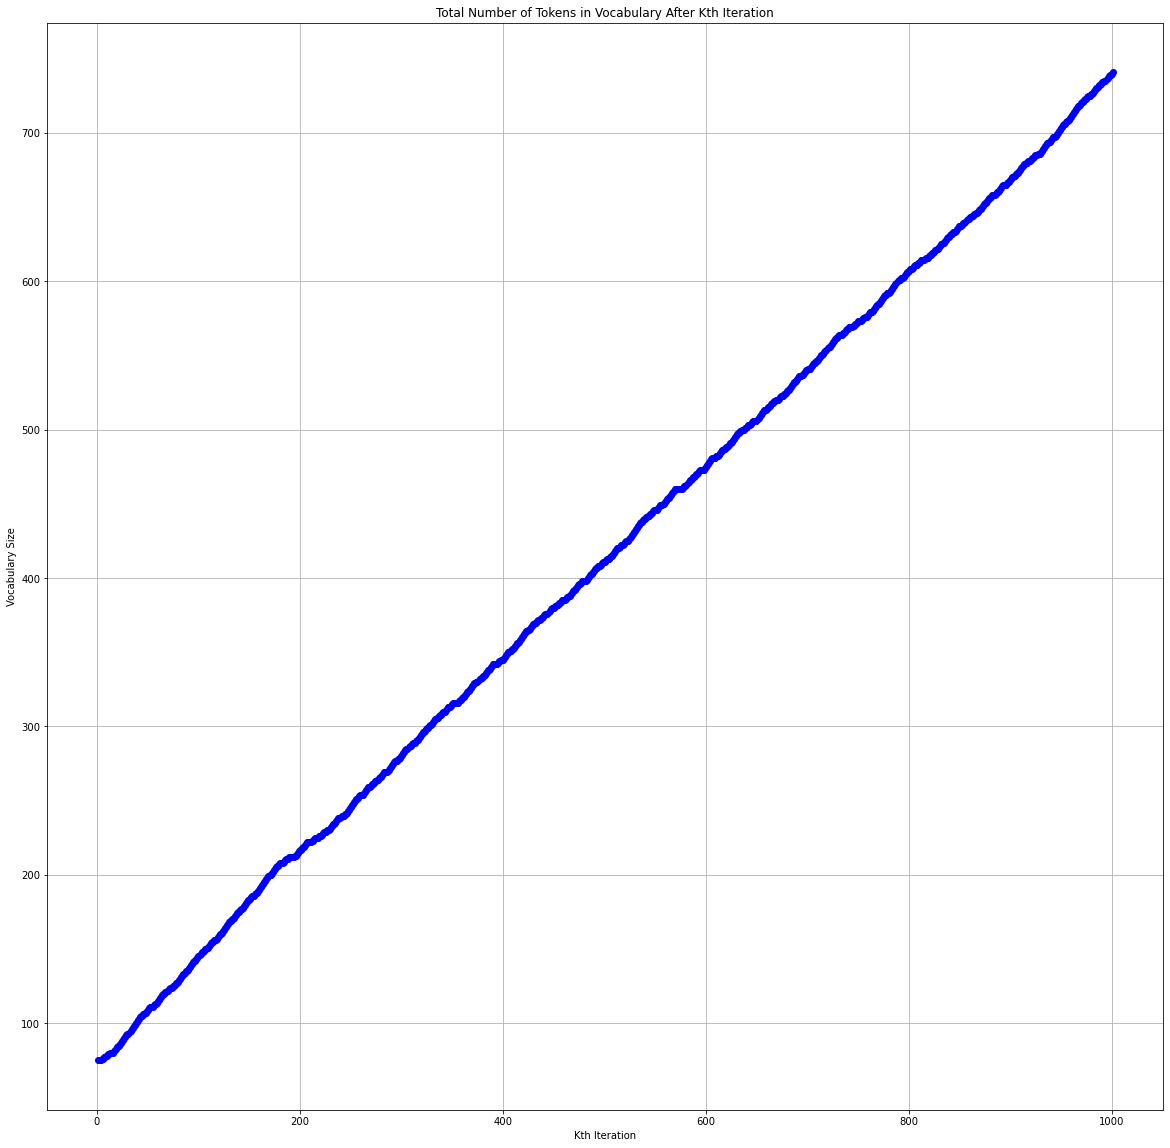

In [84]:
### 6. Visualizations

kth_iter = range(1, len(vocab_size_evol) + 1)
plt.figure(figsize=(20, 20))
plt.plot(kth_iter, vocab_size_evol, marker='o', color='b')
plt.xlabel("Kth Iteration") 
plt.ylabel("Vocabulary Size")
plt.title("Total Number of Tokens in Vocabulary After Kth Iteration")
plt.grid(True)  # Add grid
plt.show()

In [ ]:
y_values = [item[2] for item in freq_BPE] 

kth_iter = range(1, len(freq_BPE) + 1)

plt.figure(figsize=(20, 20))
plt.bar(kth_iter, y_values, color='skyblue', edgecolor='skyblue')
plt.xlabel("Kth Iteration")
plt.ylabel("Frequency of pair")
plt.title("Frequency of Most Frequent Pair after Kth Iteration")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Part 2